# Factors Affecting Loan Listings and Payment: 

## Investigation Overview

The project focuses on communicating the findings after performing the exploratory and explanatory analysis on the loan dataset provided on the Udacity classroom environment. 
This investigation will focus more determining the patterns of listing and investigating factors that affect affect listing and payment payment.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, payment period of the loan, employment status of the borrower and many more factors relating to the listings.


In [1]:
#import the libraries to be used.
import pandas as pd
%matplotlib inline
import numpy as np
import requests
from matplotlib import pyplot as plt
from matplotlib import rcParams as rP
import seaborn as sns
import os

In [2]:
# Read CSV (comma-separated) file into DataFrame usind pandas
df = pd.read_csv('prosperLoanData.csv')

## Cleaning process
- Delete duplicates
- Delete unnecessary columns
- Renaming variables with distinct names

In [3]:
#Creatin a copy of the dataset
df_clean=df.copy();

In [4]:
df_clean['Term'].unique()

array([36, 60, 12])

In [5]:
#Listing the loan statuses available
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [6]:
#Renaming loan status with "pats due...." distinct name
Past_Due = ['Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 'Past Due (>120 days)']
for phrase in Past_Due:
    df_clean.LoanStatus.replace( phrase , 'Past Due', inplace=True)
    

In [7]:
#Check for success
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [8]:
#Splitting the listing creation date into day, month and year.
df_clean[['ListingCreationYear','ListingCreationDateMonth','ListingCreationDateDate']]=df_clean['ListingCreationDate'].str.split('-', expand=True);
df_clean


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationDateMonth,ListingCreationDateDate
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,1.0,0,0,0.0,258,2007,08,26 19:09:29.263000000
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,2014,02,27 08:28:07.900000000
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,1.0,0,0,0.0,41,2007,01,05 15:00:47.090000000
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,2012,10,22 11:02:35.010000000
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,2013,09,14 18:38:39.097000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,1.0,0,0,0.0,1,2013,04,14 05:55:02.663000000
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,1.0,0,0,0.0,22,2011,11,03 20:42:55.333000000
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,1.0,0,0,0.0,119,2013,12,13 05:49:12.703000000
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,1.0,0,0,0.0,274,2011,11,14 13:18:26.597000000


In [9]:
#Separating listing quarter from listing year
df_clean[['LoanOriginationQuarter','LoanOriginationYear']]=df_clean['LoanOriginationQuarter'].str.split(' ', expand=True);
df_clean


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationYear,ListingCreationDateMonth,ListingCreationDateDate,LoanOriginationYear
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,1.0,0,0,0.0,258,2007,08,26 19:09:29.263000000,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,1.0,0,0,0.0,1,2014,02,27 08:28:07.900000000,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,1.0,0,0,0.0,41,2007,01,05 15:00:47.090000000,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,1.0,0,0,0.0,158,2012,10,22 11:02:35.010000000,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,1.0,0,0,0.0,20,2013,09,14 18:38:39.097000000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,1.0,0,0,0.0,1,2013,04,14 05:55:02.663000000,2013
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,0.0,1.0,0,0,0.0,22,2011,11,03 20:42:55.333000000,2011
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,1.0,0,0,0.0,119,2013,12,13 05:49:12.703000000,2013
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,1.0,0,0,0.0,274,2011,11,14 13:18:26.597000000,2011


In [10]:
#Check for success
df_clean.LoanOriginationQuarter.value_counts()

Q4    31386
Q1    29678
Q3    27967
Q2    24906
Name: LoanOriginationQuarter, dtype: int64

In [11]:
#Check for success
df_clean.ListingCreationYear.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationYear, dtype: int64

In [12]:
#Checking the different employment status recorded.
df_clean['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [13]:
df_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [14]:
#Defining employment status for all the entries
Employed = ['Full-time','Self-employed','Part-time']
Umployed = ['Not employed','Retired']
Undefined = ['Not available','Other']

In [15]:
#Providing definitive names for employment status by remaning some status into one category.
df_clean['EmploymentStatus'].replace(['Full-time','Self-employed','Part-time'],['Employed','Employed','Employed'], inplace=True)
df_clean['EmploymentStatus'].replace(['Not employed','Retired'],['Umployed','Umployed'], inplace=True)
df_clean['EmploymentStatus'].replace(['Not available','Other'],['Undefined','Undefined'], inplace=True)



In [16]:
# Check for success
df_clean.EmploymentStatus.value_counts()

Employed     100899
Undefined      9153
Umployed       1630
Name: EmploymentStatus, dtype: int64

In [17]:
# Check for success
df_clean.LoanOriginationQuarter.value_counts()

Q4    31386
Q1    29678
Q3    27967
Q2    24906
Name: LoanOriginationQuarter, dtype: int64

In [18]:
#create functions for the graphs
def labler_fn(xaxis, yaxis, title):
    xaxis = plt.xlabel(xaxis)
    yaxis = plt.ylabel(yaxis)
    title = plt.title(title)
    

base_color = sns.color_palette()[0]

#A fanction for creating a bar graph.
def bar(x, y, xaxis, yaxis, title):
    plt.bar(x, y,)
    labler_fn(xaxis, yaxis, title)
plt.show()

#A fanction for creating a histogram graph.
def hist(x, xaxis, yaxis, title):
    plt.hist(x)
    labler_fn(xaxis, yaxis, title)
plt.show()

#Arranging prosper rating and listing creation year from least to most to assist in easy interpretation of the graphs
df_clean["ProsperRating (Alpha)"] = pd.Categorical(df_clean["ProsperRating (Alpha)"], categories=['HR','E','D','C','B','A','AA'],ordered=True)
df_clean['ListingCreationYear'] = pd.Categorical(df_clean['ListingCreationYear'], categories=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'],ordered=True)


## ExplanatoryAnalysis

## Payment period terms and employment status on Listings 

#### Highest number of borrowers are employed, followed by borrowers who did not list their employment status while the number of  unemployed are the least borrowers. 

#### Most listings are done with a term of 36 months, followed by 60 months while the least is 12 months. Hence most common period is mid-term, short and long term listings are not that popular. When you do a comparison of the count of listing and original amount of loan, its clearly evident that higher amount of loan does not equate to higher loan amounts but the reverse is true for a 12 month term.

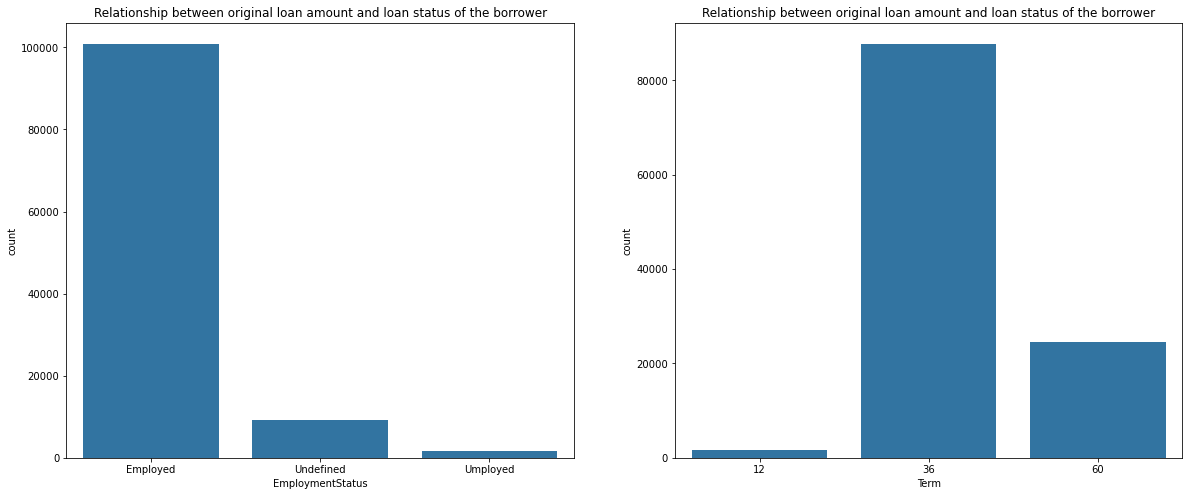

In [19]:
# Plot distribution employment status and term of listings
#Right plot
plt.figure(figsize = (20, 8));
plt.subplot(1, 2, 1)
sns.countplot(data = df_clean, x = 'EmploymentStatus', color = base_color)
plt.title('Relationship between original loan amount and loan status of the borrower');

#Right plot
default_color = sns.color_palette()[0]
plt.subplot(1, 2, 2)
sns.countplot(data = df_clean, x = 'Term', color = default_color)
plt.title('Relationship between original loan amount and loan status of the borrower');

plt.show()

## Correlation between original loan amount and investors.
##### The graph below depicts a rise in the original loan amount leads to a slight rise the number of investors. It is also important to note that more investors are associated with borrowers with lower original loan amounts, this is indicated by the concentration on the graph between 0 and 2500 USD, we have less investors with loans that are above 25000. The more loan you take the more like you wont have an investor.

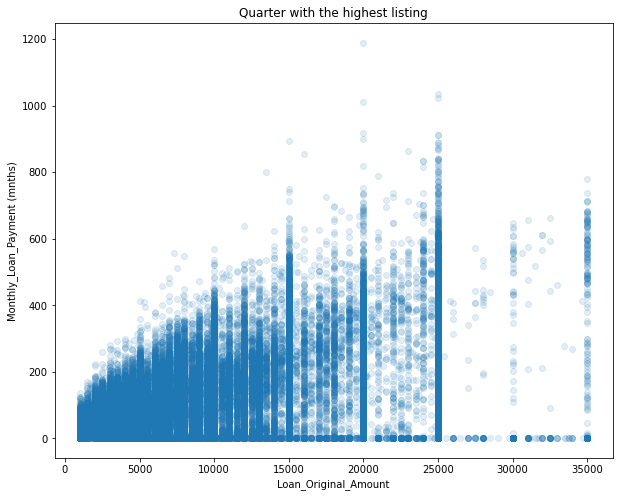

In [20]:
plt.figure(figsize = (10, 8));
def scatterplot_solution():
    plt.scatter(data = df_clean, x = 'LoanOriginalAmount', y = 'Investors', alpha = 1/8)
    plt.xlabel('Loan_Original_Amount')
    plt.ylabel('Monthly_Loan_Payment (mnths)')
    plt.title('Quarter with the highest listing');

scatterplot_solution()

## In which term and quarter do we have the highest amount of borrowing?
##### From the above graphs, we can tell that most listing, happened in quarter 1 followed by quarter 4, translating into the beginning and end of every year, quarter 2 and 3 had almost the same amount of listing with quarter 3 being slightly higher and the second graph brings in the aspect of the payment term period. It is evident that highest amount of original loan amount borrowed had a listing term of 60 months. There for huge amounts of loans were listed in the Q1 &Q2 with a payment Term period of 60 months.

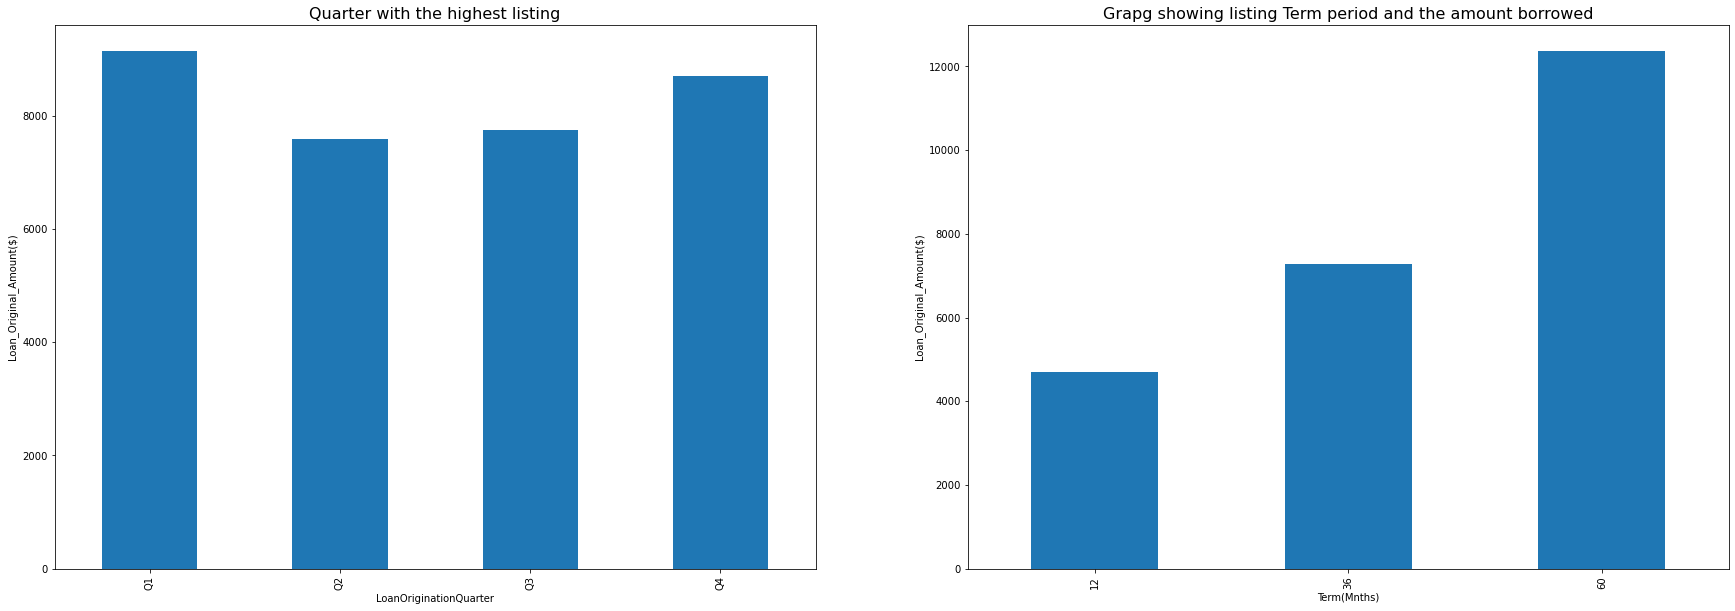

In [21]:
#Plot a graph to show how loan amount relates to the term of borrowing
#Left plot
# Plot a bar graph
plt.figure(figsize = (30, 10));
plt.subplot(1, 2, 1)
df_clean.groupby('LoanOriginationQuarter').LoanOriginalAmount.mean().plot(kind='bar')
plt.ylabel('Loan_Original_Amount($)');
plt.title('Quarter with the highest listing', fontsize = 16);

#Right plot
plt.subplot(1, 2, 2)
df_clean.groupby('Term').LoanOriginalAmount.mean().plot(kind='bar');
plt.xlabel("Term(Mnths)");
plt.ylabel('Loan_Original_Amount($)')
plt.title('Grapg showing listing Term period and the amount borrowed', fontsize = 16);

## Impact of employment status and number of investors on original loan amount.
###### We can observe from the graphs below that investors have a positive impact on the amount of loan borrowed, we also clearly see that employed borrowers  had higher number of investors and this could have contributed to them take higher amount of loan; higher security from employment and higher number of investors. On the other hand, the unemployed listings had less number of investors with a lower amount of original loans.

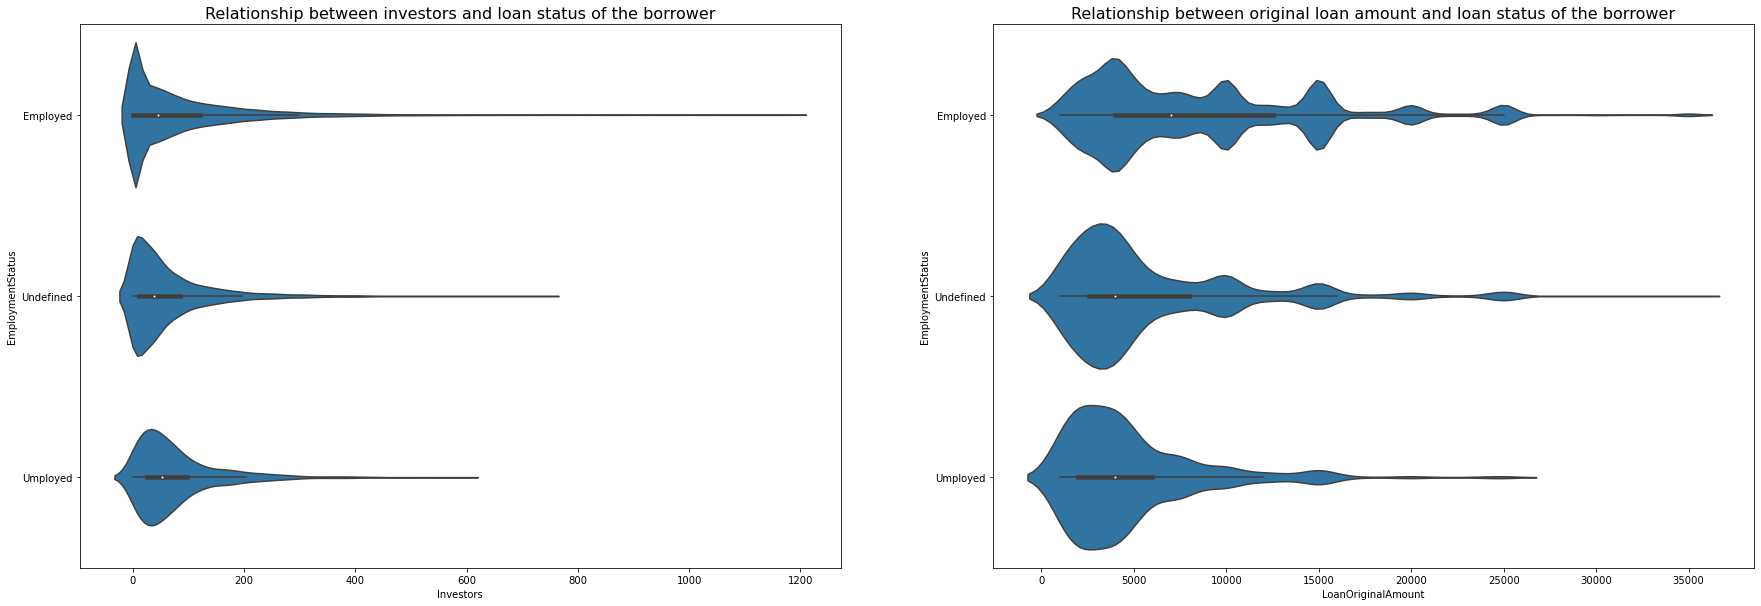

In [22]:
##### Plot a violin plot relating employment status to investors and original loan amount
# LEFT plot
plt.figure(figsize = (30, 10));
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=df_clean, y='EmploymentStatus', x='Investors', color=base_color);
plt.title('Relationship between investors and loan status of the borrower', fontsize = 16);

# RIGHT plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, y='EmploymentStatus', x='LoanOriginalAmount', color=base_color);
plt.title('Relationship between original loan amount and loan status of the borrower',fontsize = 16);
plt.ylim(ax1.get_ylim());

## Impact of investors on borrowers rating.
#### Listings with higher number of investors had higher rating compared to the listings that had less or no investors. . The number of investors on a listing has a direct impact on the performance rating. On the other hand, listings with poor or lower ratings had less investors. We can evidently see on the graph that prosper rating of "D" diverge from the pattern and registered  higher number of investors than the following year. Generally number of investors has a positive impact on the  prosper rating of the listings.

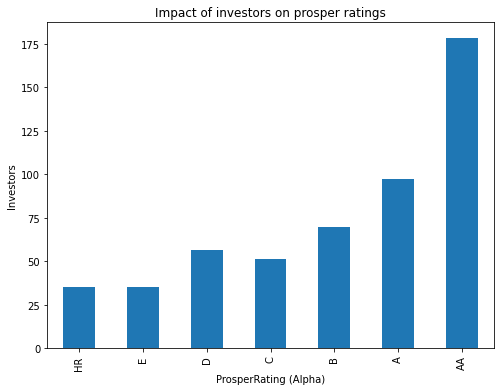

In [23]:
#Ploat a graph to show the impact of investors on borrowers rating
df_clean.groupby("ProsperRating (Alpha)").Investors.mean().plot(kind='bar', color = default_color, figsize = (8, 6))
plt.xlabel("ProsperRating (Alpha)");
plt.ylabel('Investors')
plt.title('Impact of investors on prosper ratings');

# Conclusion
The number of listings have been increasing with time since 2010 to 2013 but there was a drastic drop from 2013 to 2014. Most listing are made up of employed individuals who are home owners with a 36 term period.
Investors also play an important role during listing since borrowers who had more investors tend to receive better prosper ratings. It is also important to note that individuals who take huge amount of loans prefer 60 term payment period. Generally the listings constitute highest number of individual who are employed preferring a 36 months listing period.

In [24]:
!jupyter nbconvert Communicate_Data_Findings_Explanatory_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Communicate_Data_Findings_Explanatory_Part2.ipynb to slides
[NbConvertApp] Writing 906881 bytes to Communicate_Data_Findings_Explanatory_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/sokomac/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/sokomac/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/sokomac/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/sokomac/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/Users/sokomac/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.